<a href="https://colab.research.google.com/github/chape8/Signal-Processing-III/blob/main/MiniProyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']
(1288, 1850) (1288,)


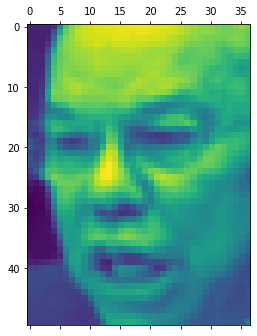

In [17]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

print(lfw_people.target_names)
data = lfw_people.data
target = lfw_people.target
print(data.shape,target.shape)
# Ejemplo para graficar
import matplotlib.pyplot as plt
plt.matshow(lfw_people.images[500])
plt.show()

In [23]:
pca = PCA(n_components = 1000, svd_solver='randomized')
pca.fit(data)

PCA(n_components=1000, svd_solver='randomized')

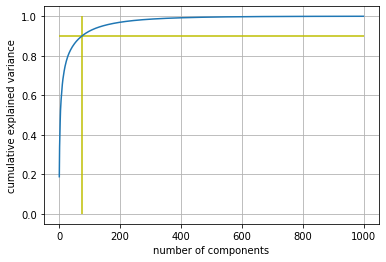

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.vlines(75,0.,1.,colors='y')
plt.hlines(0.9,0.,1000.,colors='y')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show()

In [33]:
pca = PCA(n_components = 150,svd_solver='randomized').fit(data)
Xfaces = data
components = pca.transform(data)

C = 1e-05 	Acc = 0.4114906832298137


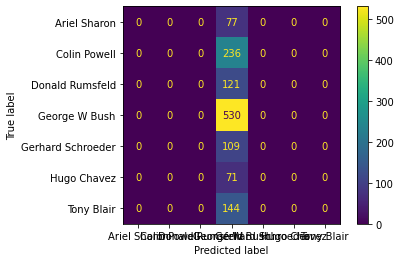

C = 0.001 	Acc = 0.4114906832298137


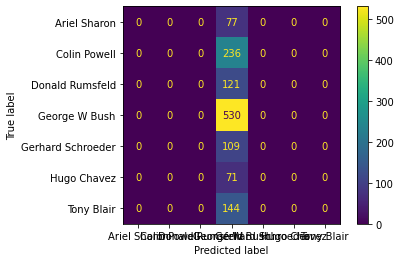

C = 0.1 	Acc = 0.4340062111801242


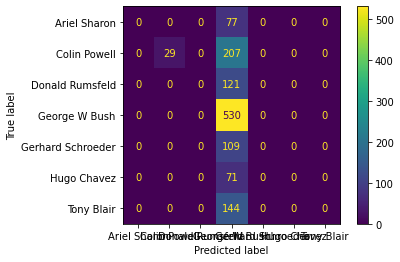

C = 0.2 	Acc = 0.5364906832298136


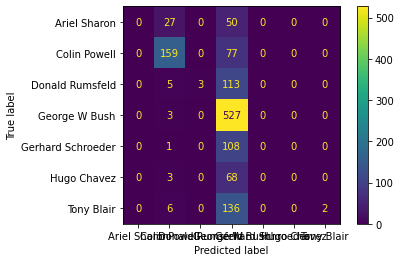

C = 0.3 	Acc = 0.6001552795031055


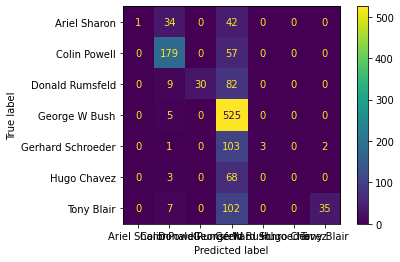

C = 0.4 	Acc = 0.702639751552795


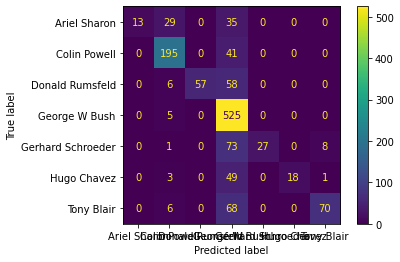

C = 0.5 	Acc = 0.78027950310559


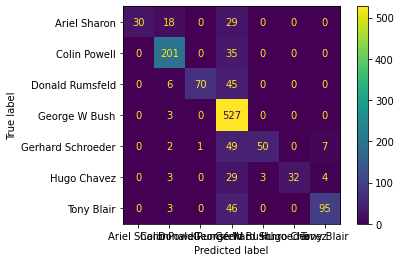

C = 1 	Acc = 0.9635093167701864


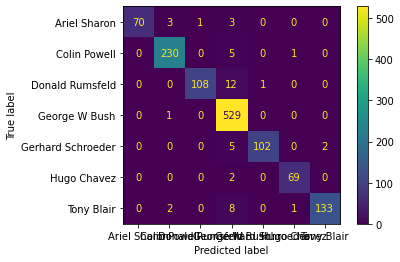

C = 5 	Acc = 1.0


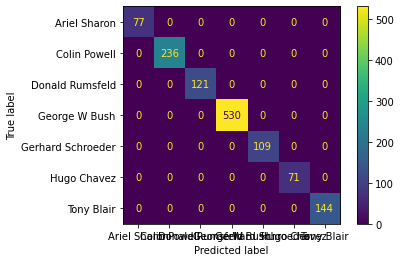

C = 10 	Acc = 1.0


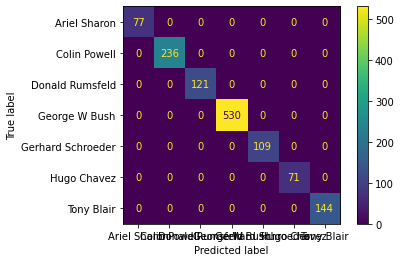

In [102]:
from sklearn import svm
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
C = [1e-5, 1e-3, 1e-1, 0.2, 0.3, 0.4, 0.5 , 1, 5, 10]

for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'rbf')
  model.fit(components,target)

  yPred = model.predict(components)
  CMAT = confusion_matrix(target,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(target)
  print("C =",c,"\tAcc =",porcentajeAcierto)

  ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
  ax.plot()
  plt.show()



<function matplotlib.pyplot.show(*args, **kw)>

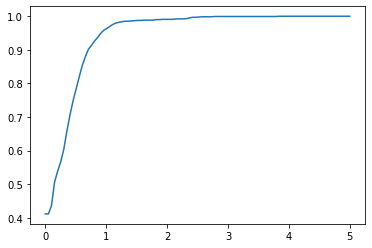

In [104]:
C = np.linspace(5e-5,5,100)
acc_vector = []
for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'rbf')
  model.fit(components,target)

  yPred = model.predict(components)
  CMAT = confusion_matrix(target,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(target)
  acc_vector.append(porcentajeAcierto)

plt.plot(C,acc_vector)
plt.show

C= 1e-12 	degree= 1 	Acc= 0.4114906832298137


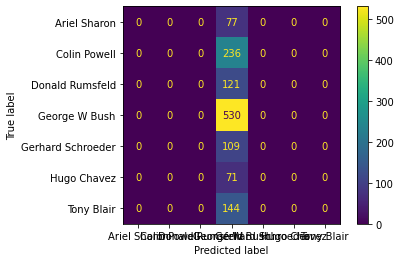

C= 1e-12 	degree= 2 	Acc= 0.4114906832298137


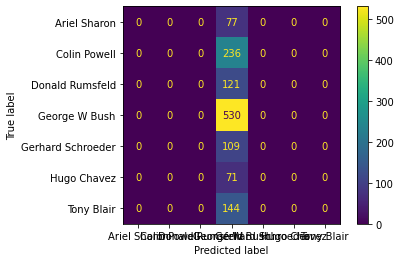

C= 1e-12 	degree= 3 	Acc= 0.9541925465838509


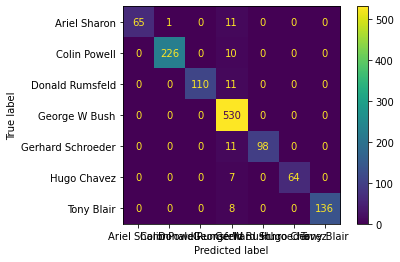

C= 1e-10 	degree= 1 	Acc= 0.4114906832298137


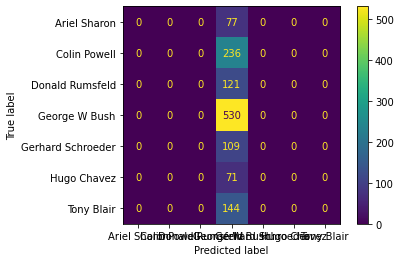

C= 1e-10 	degree= 2 	Acc= 0.4114906832298137


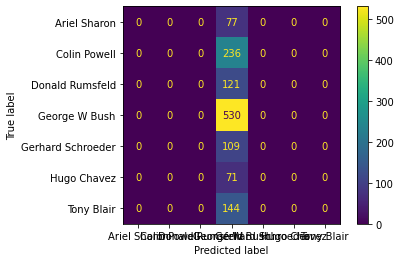

C= 1e-10 	degree= 3 	Acc= 1.0


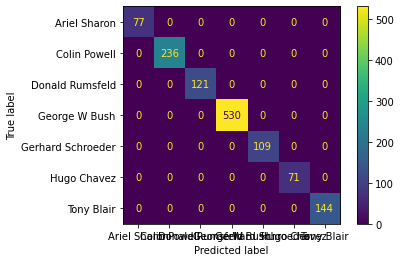

C= 1e-05 	degree= 1 	Acc= 0.577639751552795


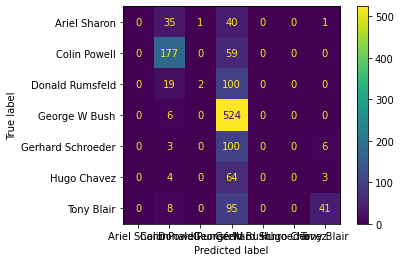

C= 1e-05 	degree= 2 	Acc= 1.0


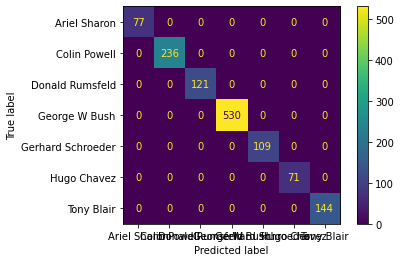

C= 1e-05 	degree= 3 	Acc= 1.0


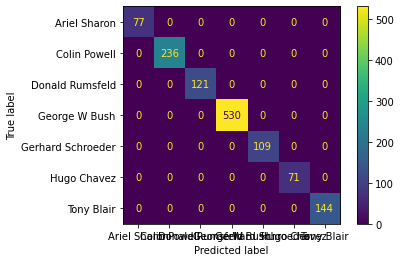

C= 0.1 	degree= 1 	Acc= 1.0


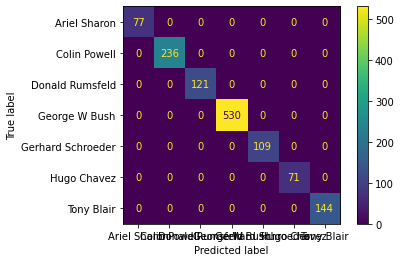

C= 0.1 	degree= 2 	Acc= 1.0


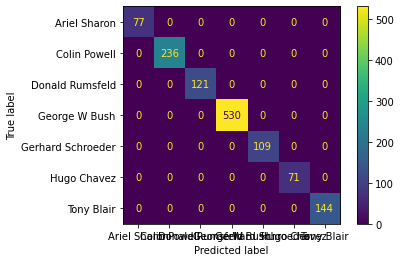

C= 0.1 	degree= 3 	Acc= 1.0


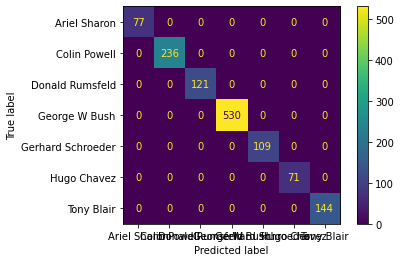

In [113]:
C = [1e-12, 1e-10, 1e-5, 1e-1]
degree = [1, 2, 3]

for c in C:
  # Entrenemos nuestro modelo
  for deg in degree:
    model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = deg)
    model.fit(components,target)

    yPred = model.predict(components)
    CMAT = confusion_matrix(target,yPred)
    porcentajeAcierto = np.sum(np.diag(CMAT)) / len(target)
    print("C=",c,"\tdegree=",deg,"\tAcc=",porcentajeAcierto)

    ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
    ax.plot()
    plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

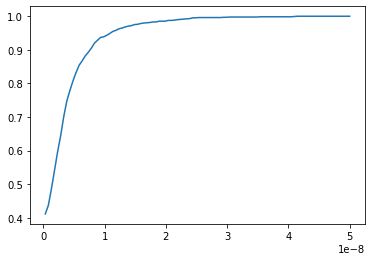

In [122]:
C = np.linspace(3e-10,5e-8,100)
acc_vector = []
for c in C:
  # Entrenemos nuestro modelo
  model = svm.SVC(C = c, kernel = 'poly', gamma = 'auto', degree = 2)
  model.fit(components,target)

  yPred = model.predict(components)
  CMAT = confusion_matrix(target,yPred)
  porcentajeAcierto = np.sum(np.diag(CMAT)) / len(target)
  acc_vector.append(porcentajeAcierto)

plt.plot(C,acc_vector)
plt.show

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8928571428571429


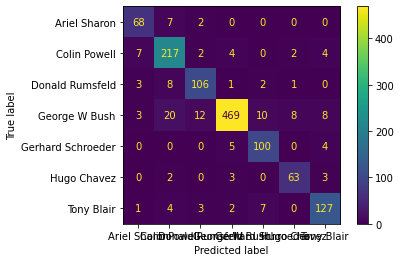

In [97]:
# Entrenemos nuestro modelo
model = svm.LinearSVC(C = 5e-5, max_iter=2000)
model.fit(components,target)

yPred = model.predict(components)
CMAT = confusion_matrix(target,yPred)
porcentajeAcierto = np.sum(np.diag(CMAT)) / len(target)
print(porcentajeAcierto)

ax = ConfusionMatrixDisplay(CMAT,display_labels=lfw_people.target_names)
ax.plot()
plt.show()